In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import librosa
import IPython.display as ipd

In [2]:
# Path to the dataset
dataset_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Voice of Birds"

# Image size
IMAGE_SIZE = (224, 224)

In [3]:
import os

DATA_PATH = 'C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Voice of Birds\\train'  # Change this to the actual path of your data

# Get a list of subdirectories (potential class labels)
class_labels = os.listdir(DATA_PATH)
class_labels.sort()
bird_class=[]
print("Class Labels (Bird Species):")
for label in class_labels:
    bird_class.append(label)
print(bird_class)
print("\nBird Classes : ",len(bird_class))

Class Labels (Bird Species):
['Andean Guan_sound', 'Andean Tinamou_sound', 'Asian Koel', 'Australian Brushturkey_sound', 'Band-tailed Guan_sound', 'Barred Tinamou_sound', 'Bartletts Tinamou_sound', 'Baudo Guan_sound', 'Bearded Guan_sound', 'Berlepschs Tinamou_sound', 'Biak Scrubfowl_sound', 'Black Kite', 'Black Tinamou_sound', 'Black-billed Brushturkey_sound', 'Black-breasted Parrotbill', 'Black-capped Tinamou_sound', 'Black-fronted Piping Guan_sound', 'Black-necked crane', 'Blue-throated Piping Guan_sound', 'Brazilian Tinamou_sound', 'Bristled Grassbird', 'Brown Tinamou_sound', 'Brushland Tinamou_sound', 'Buff-browed Chachalaca_sound', 'Cauca Guan_sound', 'Chaco Chachalaca_sound', 'Cheer Pheasant', 'Chestnut-bellied Guan_sound', 'Chestnut-headed Chachalaca_sound', 'Chestnut-winged Chachalaca_sound', 'Chilean Tinamou_sound', 'Choco Tinamou_sound', 'Cinereous Tinamou_sound', 'Collared Brushturkey_sound', 'Colombian Chachalaca_sound', 'Common Cuckoo', 'Common Ostrich_sound', 'Common Poch

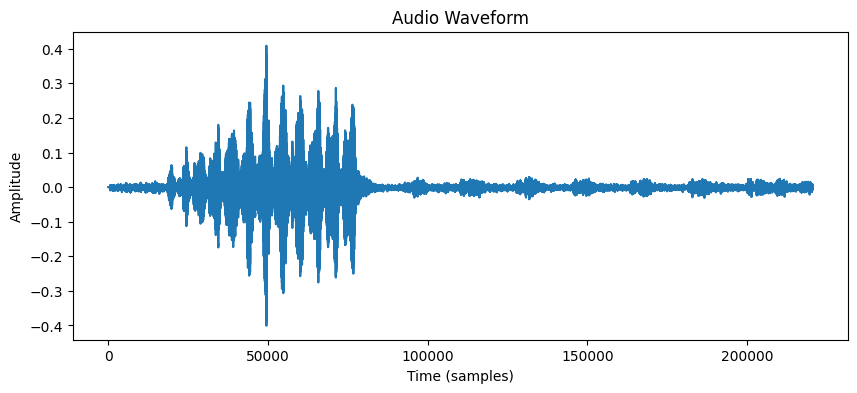

In [4]:
# Path to your audio file
SOUND_DIR = 'C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Voice of Birds\\train\Asian Koel\\XC161198 0.mp3'

# Listen to the recording
ipd.display(ipd.Audio(SOUND_DIR))

# Load the entire audio file
signal, sr = librosa.load(SOUND_DIR)

# Plot the entire recording signal
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.title('Audio Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

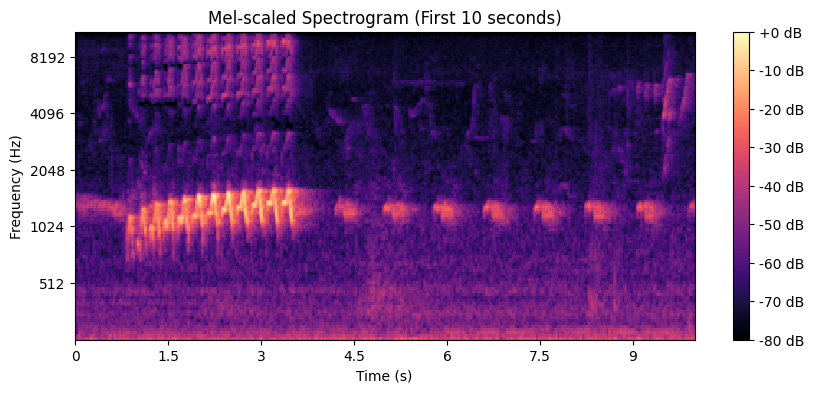

In [5]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Path to your audio file
SOUND_DIR = 'C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Voice of Birds\\train\Asian Koel\\XC161198 0.mp3'

# Load the audio file
signal, sr = librosa.load(SOUND_DIR)

# Select the first 10 seconds of the audio
duration_to_select = 10  # Duration to select in seconds
samples_to_select = int(duration_to_select * sr)
signal_10s = signal[:samples_to_select]

# Plot mel-scaled spectrogram
N_FFT = 2048  # Number of FFT points
HOP_SIZE = 512  # Hop size
N_MELS = 128  # Number of Mel bands
FMIN = 20  # Minimum frequency

S = librosa.feature.melspectrogram(
    y=signal_10s,
    sr=sr,
    n_fft=N_FFT,
    hop_length=HOP_SIZE,
    n_mels=N_MELS,
    fmin=FMIN,
    fmax=sr / 2
)

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    librosa.power_to_db(S, ref=np.max),
    sr=sr,
    hop_length=HOP_SIZE,
    x_axis='time',
    y_axis='mel',
    fmin=FMIN,
    fmax=sr / 2
)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled Spectrogram (First 10 seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


In [7]:
import numpy as np

# Load preprocessed data
X_train = np.load('C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Bird_Species_Classification_Streamlit\\preprocessed_data\\X_train.npy')
X_test = np.load('C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Bird_Species_Classification_Streamlit\\preprocessed_data\\X_test.npy')
X_valid = np.load('C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Bird_Species_Classification_Streamlit\\preprocessed_data\\X_valid.npy')
y_train=np.load('C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Bird_Species_Classification_Streamlit\\preprocessed_data\\y_train.npy')
y_test=np.load('C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Bird_Species_Classification_Streamlit\\preprocessed_data\\y_test.npy')
y_valid=np.load('C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Bird_Species_Classification_Streamlit\\preprocessed_data\\y_valid.npy')

In [8]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_valid:", y_valid.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7568, 224, 224)
Shape of y_train: (7568,)
Shape of X_valid: (3351, 224, 224)
Shape of y_valid: (3351,)
Shape of X_test: (3355, 224, 224)
Shape of y_test: (3355,)


In [9]:
# from keras.applications import VGG16
# from keras.models import Model
# from keras.layers import Flatten, Dense
# import numpy as np

spectrogram_height = 224
spectrogram_width = 224
num_channels = 3  # Convert single-channel spectrograms to three channels

# # Stack the single-channel spectrogram to create three channels
# X_train_rgb = np.stack((X_train,) * num_channels, axis=-1)
# X_valid_rgb = np.stack((X_valid,) * num_channels, axis=-1)
# X_test_rgb = np.stack((X_test,) * num_channels, axis=-1)
# Stack the single-channel spectrogram to create three channels
X_train_rgb = np.repeat(X_train[:, :, :, np.newaxis], 3, axis=-1)
X_valid_rgb = np.repeat(X_valid[:, :, :, np.newaxis], 3, axis=-1)
X_test_rgb = np.repeat(X_test[:, :, :, np.newaxis], 3, axis=-1)

# Load pre-trained VGG16 model (without the top FC layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(spectrogram_height, spectrogram_width, num_channels))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom FC layers on top of VGG16
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(bird_class), activation='softmax')(x)

# Create the final model
vgg_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [10]:
# Print model summary
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import SGD

# Load pre-trained VGG16 model (without the top FC layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(spectrogram_height, spectrogram_width, num_channels))

# Freeze the convolutional layers except the last few
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Add custom FC layers on top of VGG16
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(len(bird_class), activation='softmax')(x)

# Create the final model
vgg_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a lower learning rate
vgg_model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Train the model with reduced batch size
r = vgg_model.fit(
    X_train_rgb,
    y_train,
    validation_data=(X_valid_rgb, y_valid),
    epochs=30,
    batch_size=8,  # Decrease the batch size
    steps_per_epoch=len(X_train_rgb) // 8,  # Adjust steps per epoch accordingly
    validation_steps=len(X_valid_rgb) // 8
)

Epoch 1/30


946/946 [==============================] - 1767s 2s/step - loss: 4.4797 - accuracy: 0.0493 - val_loss: 4.5729 - val_accuracy: 0.0185
Epoch 2/30
946/946 [==============================] - 1569s 2s/step - loss: 4.0883 - accuracy: 0.0793 - val_loss: 4.3390 - val_accuracy: 0.0834
Epoch 3/30
946/946 [==============================] - 1551s 2s/step - loss: 3.8719 - accuracy: 0.1161 - val_loss: 4.1969 - val_accuracy: 0.1074
Epoch 4/30
946/946 [==============================] - 1658s 2s/step - loss: 3.6820 - accuracy: 0.1473 - val_loss: 3.9834 - val_accuracy: 0.1364
Epoch 5/30
946/946 [==============================] - 1630s 2s/step - loss: 3.4814 - accuracy: 0.1834 - val_loss: 3.7664 - val_accuracy: 0.2198
Epoch 6/30
946/946 [==============================] - 1623s 2s/step - loss: 3.3275 - accuracy: 0.2149 - val_loss: 3.6454 - val_accuracy: 0.2377
Epoch 7/30
946/946 [==============================] - 1819s 2s/step - loss: 3.1585 - accuracy: 0.2488 - val_loss: 3.3924 - val_accurac

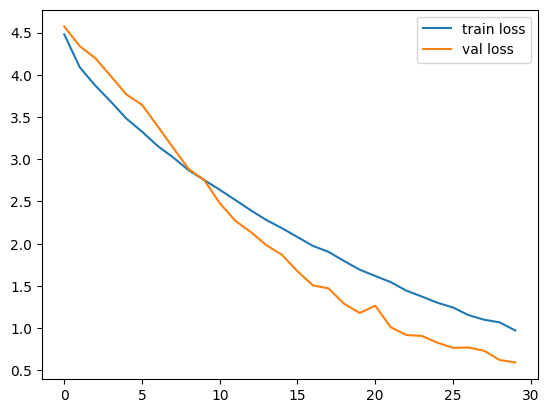

In [13]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

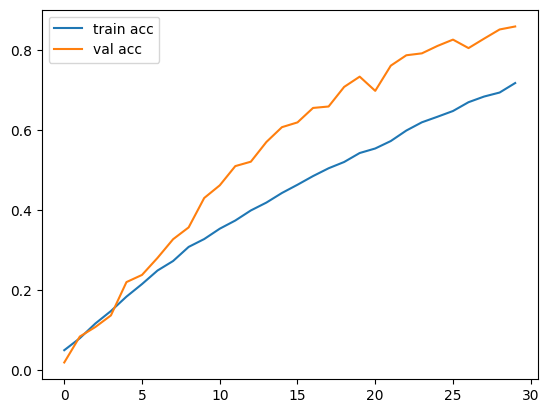

In [14]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [19]:
vgg_model.save('audio_model.h5')

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('audio_model.h5',compile=False)  


Converted audio to Spectrogram

(224, 224, 3)
1/1 [==============================] - 1s 515ms/step


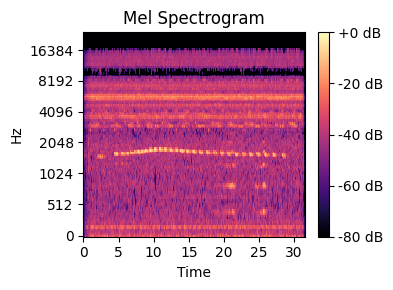


Predicted: Greater Spotted Eagle


In [21]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import tensorflow as tf
from skimage.transform import resize

target_shape=(224, 224)
# 1. Loading the audio file
audio_file_path = 'C:\\Users\DELL\\OneDrive\\Desktop\\MajorProject\\Voice of Birds\\valid\\Barred Tinamou_sound\\Barred Tinamou2.mp3'

ipd.display(ipd.Audio(audio_file_path))

y, sr = librosa.load(audio_file_path, sr=None)

# 2. Load the saved model
loaded_model = tf.keras.models.load_model('audio_model.h5')

# 3. Load a new audio file
y, sr = librosa.load(audio_file_path, sr=None)


# Generate a spectrogram (image representation) of the audio
print("\nConverted audio to Spectrogram\n")

# 4. Extract features (e.g., mel spectrogram) from the audio
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# # Resize the spectrogram to match the input shape of the model
# mel_spectrogram_resized =  resize(mel_spectrogram, target_shape)


# # Expand dimensions to match the expected input shape of the model
# processed_input = np.expand_dims(mel_spectrogram_resized, axis=-1)

# # Optionally, normalize the spectrogram
# processed_input = tf.keras.utils.normalize(processed_input)

# # 5. Predict the class
# prediction = loaded_model.predict(np.array([processed_input]))
# predicted_class = np.argmax(prediction)

import numpy as np

# Resize the spectrogram to match the input shape of the model
target_shape = (224, 224)  # Target shape of the spectrogram
mel_spectrogram_resized = np.resize(mel_spectrogram_db, target_shape)

# Expand dimensions to match the expected input shape of the model
processed_input = np.expand_dims(mel_spectrogram_resized, axis=-1)  # Add channel dimension

# Repeat the input to have 3 channels (assuming the model expects 3-channel input)
processed_input = np.repeat(processed_input, 3, axis=-1)

# Ensure the input has the correct shape
print(processed_input.shape)  # Verify the shape before prediction
# Ensure the input has the correct shape
processed_input = np.expand_dims(processed_input, axis=0)  # Add batch dimension

# 5. Predict the class
prediction = loaded_model.predict(processed_input)
predicted_class = np.argmax(prediction)

# 6. Display the mel spectrogram
plt.figure(figsize=(4, 3))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

bird_class = ['Andean Guan_sound', 'Andean Tinamou_sound', 'Asian Koel', 'Australian Brushturkey_sound', 'Band-tailed Guan_sound', 'Barred Tinamou_sound', 'Bartletts Tinamou_sound', 'Baudo Guan_sound', 'Bearded Guan_sound', 'Berlepschs Tinamou_sound', 'Biak Scrubfowl_sound', 'Black Kite', 'Black Tinamou_sound', 'Black-billed Brushturkey_sound', 'Black-breasted Parrotbill', 'Black-capped Tinamou_sound', 'Black-fronted Piping Guan_sound', 'Black-necked crane', 'Blue-throated Piping Guan_sound', 'Brazilian Tinamou_sound', 'Bristled Grassbird', 'Brown Tinamou_sound', 'Brushland Tinamou_sound', 'Buff-browed Chachalaca_sound', 'Cauca Guan_sound', 'Chaco Chachalaca_sound', 'Cheer Pheasant', 'Chestnut-bellied Guan_sound', 'Chestnut-headed Chachalaca_sound', 'Chestnut-winged Chachalaca_sound', 'Chilean Tinamou_sound', 'Choco Tinamou_sound', 'Cinereous Tinamou_sound', 'Collared Brushturkey_sound', 'Colombian Chachalaca_sound', 'Common Cuckoo', 'Common Ostrich_sound', 'Common Pochard', 'Common Wood Pigeon', 'Crested Guan_sound', 'Curve-billed Tinamou_sound', 'Darwins Nothura_sound', 'Dusky Megapode_sound', 'Dusky-legged Guan_sound', 'Dwarf Cassowary_sound', 'Dwarf Tinamou_sound', 'East Brazilian Chachalaca_sound', 'Eastern Imperial Eagle', 'Egyptian Vulture', 'Elegant Crested Tinamou_sound', 'Emu_sound', 'Great Slaty Woodpecker', 'Great Spotted Kiwi_sound', 'Great Tinamou_sound', 'Greater Rhea_sound', 'Greater Spotted Eagle', 'Grey Tinamou_sound', 'Grey Treepie', 'Grey-crowned Prinia', 'Grey-headed Chachalaca_sound', 'Grey-legged Tinamou_sound', 'Grey-sided Thrush', 'Highland Tinamou_sound', 'Himalayan Monal', 'Hooded Tinamou_sound', 'House Crow', 'House Sparrow', 'Huayco Tinamou_sound', 'Indian Spotted Eagle', 'Jerdon_s Babbler', 'Kashmir Flycatcher', 'Large-billed Crow', 'Lesser Nothura_sound', 'Lesser Rhea_sound', 'Little Chachalaca_sound', 'Little Spotted Kiwi_sound', 'Little Tinamou_sound', 'Long-tailed Duck', 'Maleo_sound', 'Malleefowl_sound', 'Marail Guan_sound', 'Melanesian Megapode_sound', 'Micronesian Megapode_sound', 'Moluccan Megapode_sound', 'New Guinea Scrubfowl_sound', 'Nicobar Megapode_sound', 'North Island Brown Kiwi_sound', 'Northern Cassowary_sound', 'Okarito Kiwi_sound', 'Orange-footed Scrubfowl_sound', 'Ornate Tinamou_sound', 'Pale-browed Tinamou_sound', 'Pallas_s Fish Eagle', 'Patagonian Tinamou_sound', 'Philippine Megapode_sound', 'Plain Chachalaca_sound', 'Puna Tinamou_sound', 'Quebracho Crested Tinamou_sound', 'Red-billed Blue Magpie', 'Red-billed Brushturkey_sound', 'Red-faced Guan_sound', 'Red-legged Tinamou_sound', 'Red-throated Piping Guan_sound', 'Red-winged Tinamou_sound', 'Rose-ringed Parakeet', 'Rufous Treepie', 'Rufous-bellied Chachalaca_sound', 'Rufous-headed Chachalaca_sound', 'Rufous-necked Hornbill', 'Rufous-vented Chachalaca_sound', 'Rustic Bunting', 'Rusty Tinamou_sound', 'Rusty-margined Guan_sound', 'Saker Falcon', 'Sarus Crane', 'Satyr Tragopan', 'Scaled Chachalaca_sound', 'Slaty-breasted Tinamou_sound', 'Slender-billed Babbler', 'Small-billed Tinamou_sound', 'Solitary Tinamou_sound', 'Somali Ostrich_sound', 'Southern Brown Kiwi_sound', 'Southern Cassowary_sound', 'Speckled Chachalaca_sound', 'Spiny Babbler', 'Spixs Guan_sound', 'Spotted Dove', 'Spotted Nothura_sound', 'Steppe Eagle', 'Sula Megapode_sound', 'Swamp Francolin', 'Swamp Grass-babbler', 'Taczanowskis Tinamou_sound', 'Tanimbar Megapode_sound', 'Tataupa Tinamou_sound', 'Tawny-breasted Tinamou_sound', 'Tepui Tinamou_sound', 'Thicket Tinamou_sound', 'Tongan Megapode_sound', 'Trinidad Piping Guan_sound', 'Undulated Tinamou_sound', 'Vanuatu Megapode_sound', 'Variegated Tinamou_sound', 'Wattled Brushturkey_sound', 'West Mexican Chachalaca_sound', 'White-bellied Chachalaca_sound', 'White-bellied Nothura_sound', 'White-browed Guan_sound', 'White-crested Guan_sound', 'White-throated Bushchat', 'White-throated Tinamou_sound', 'White-winged Guan_sound', 'Wood Snipe', 'Yellow-legged Tinamou_sound']
   
 # Replace with your actual class labels

# 7. Print the predicted class
print(f'\nPredicted: {bird_class[predicted_class]}')
